---
# AERO 5 - Hands on Machine Learning for cybersecurity (2023/2024)


# 2- Ham or  Spam? 
---

In this lab session we will discuss how Machine Learning is used for spam detection. We will define our own vectorizer to clear the datasets. Then, we will use logistic regression, single neuron perceptron and the naive bayes classifier to train our model! 

The `scikit-learn` documentation is complete and should be consulted whenever necessary. In particular herein you can consult:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

https://scikit-learn.org/stable/modules/naive_bayes.html

https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction


## 1. Logistic Regression

Logistic regression is a binary classification technique. A key difference from linear regression is that the output value being modeled is a binary value rather than a numeric value. In this exercise, we will apply a logistic regression model to ingest SMS spam.

The considered dataset herein consists of a collection of 425 items from the Grumbletext website which is a site in the UK where users manually report spam text messages. In addition to the spam text messages that were randomly chosen from the National University of Singapore SMS Corpus (NSC) and have also been added to the dataset. Another 450 benign SMS messages where collected from Caroline Tag’s PhD thesis.

1. Start by importing the relevant packages : the `pandas` will be used to enable data frame capabilities, the `scikit-learn` package will be used to divide the data into training and testing datasets. We will also use the logistic regression available in `scikit-learn`.

In [30]:
# EDIT THIS CELL
# ====================== Your code here =================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# =======================================================

2. Import the dataset `SMSSpamCollection.csv` and analyze it.

In [31]:
# EDIT THIS CELL
# ====================== Your code here =================
df_og = pd.read_csv("SMSSpamCollection.csv", sep = '\t', header=None)
df_og.columns = ["class", "data"]
df_og
# =======================================================

,class,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


3. For featurization, the `TF-IDF` method is used. Transform then the data to fit the logistic regression model.

In [32]:
# EDIT THIS CELL
# ====================== Your code here =================
df = df_og
# Assuming your data has 'text' and 'label' columns
X = df['data']  # Features (text data)
y = df['class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and fit a logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)

# Make predictions on the testing set
y_pred = logreg_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# =======================================================

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



4. Consider the following test dataset : 'URGENT! Your Mobile No 1234 was awarded a Prize', 'Hey honey, what’s up?' to predict the accuracy of the model. Conclude.

In [33]:
# EDIT THIS CELL
# ====================== Your code here =================

# Test dataset
test_data = ['URGENT! Your Mobile No 1234 was awarded a Prize', 'Hey honey, what’s up?']

# Transform the test data using the TF-IDF vectorizer
test_data_tfidf = tfidf_vectorizer.transform(test_data)

# Make predictions using the logistic regression model
predictions = logreg_model.predict(test_data_tfidf)

# Display the predictions
for text, prediction in zip(test_data, predictions):
    print(f'Text: {text} \nPredicted Label: {prediction}\n')



# =======================================================

Text: URGENT! Your Mobile No 1234 was awarded a Prize 
Predicted Label: spam

Text: Hey honey, what’s up? 
Predicted Label: ham



## 2. Naïve Bayes classifier

This exercise is about using the naive bayes classifier for spam filtering based on the same dataset `SMSSpamCollection.csv`.

1. Make sure to split the data into appropriate train and test sets.

In [34]:
# EDIT THIS CELL
# ====================== Your code here =================

X = df['data']  # Features (text data)
y = df['class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =======================================================

Mails provided in data are full of unstructured mess, so it is important to preprocess this text before feature extraction and modelling. Tokenization converts continuous stream of words into separate token for each word.

In [35]:
from textblob import TextBlob
def get_tokens(msg):
    return TextBlob(str(msg)).words

2. Then the process of lemmatization groups together the inflected forms of a word so they can be analyzed as a single item, identified by the word's lemma, or dictionary form. Hence word like 'moved' and 'moving' will be reduced to 'move. Edit the next cell to write a lemmatization function.

In [36]:
# EDIT THIS CELL
def get_lemmas(msg):
# ====================== Your code here =================



# =======================================================
    return lemmas

In [37]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

def get_lemmas(msg):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(msg)
    lemmas = [lemmatizer.lemmatize(word) for word in tokens]
    lemmatized_msg = ' '.join(lemmas)
    return lemmatized_msg

# Example
original_message = "I moved and she was moving."
lemmatized_message = get_lemmas(original_message)
print(f"Original Message: {original_message}")
print(f"Lemmatized Message: {lemmatized_message}")


Original Message: I moved and she was moving.
Lemmatized Message: I moved and she wa moving .


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


3. Extract text features known as TF-IDF features. Then transform the data to fit the multinomial naïve bayes model.

In [38]:
# EDIT THIS CELL
# ====================== Your code here =================

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and fit a Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the testing set
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# =======================================================

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



4. Use the model now to make a prediction on a sample text. Then compute the accuracy of the model.Conclude.

In [39]:
# EDIT THIS CELL
# ====================== Your code here =================
# Sample text for prediction
sample_text = "Hey there! You've won a free gift. Claim it now!"

# Lemmatize the sample text (if lemmatization is part of your preprocessing)
sample_text_lemmatized = get_lemmas(sample_text)

# Transform the sample text using the TF-IDF vectorizer
sample_text_tfidf = tfidf_vectorizer.transform([sample_text_lemmatized])

# Make a prediction using the trained Multinomial Naive Bayes model
prediction = nb_model.predict(sample_text_tfidf)

# Print the prediction
print(f"Sample Text: {sample_text}")
print(f"Predicted Label: {prediction[0]}")

# If you have the actual label for the sample text, you can compare it
# with the predicted label to compute accuracy
actual_label = "spam"  # Replace with the actual label if available
if actual_label:
    accuracy_sample = 1 if prediction[0] == actual_label else 0
    print(f"Accuracy on Sample Text: {accuracy_sample}")

# =======================================================

Sample Text: Hey there! You've won a free gift. Claim it now!
Predicted Label: ham
Accuracy on Sample Text: 0


## 3. Single neural network classifier

In this exercise, you will see a concrete example of the use of perceptron. The preprocessed dataset `sms_spam_perceptron.csv` is considered where messages containing the buy and sex keywords, count for each message (ham or spam) the number of occurences of the keyword present in the text of messages. 

1. Start by importing the required librairies, loading the dataset, analyzing it and extracting then the features and the target labels. 

In [40]:
# EDIT THIS CELL
# ====================== Your code here =================

import pandas as pd

# Load the dataset
df = pd.read_csv("sms_spam_perceptron.csv")
print(df.columns)
# Analyze the dataset
print("Dataset Overview:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nClass Distribution:")
print(df['type'].value_counts())

# Extract features and target labels
X = df[['buy', 'sex']]  # Assuming 'buy' and 'sex' are the keyword counts
y = df['type']

# Display the first few rows of the features and labels
print("\nFeatures (X):")
print(X.head())
print("\nTarget Labels (y):")
print(y.head())


# =======================================================

Index(['type', 'sex', 'buy'], dtype='object')
Dataset Overview:
   type  sex  buy
0   ham    0    1
1   ham    0    1
2   ham    1    1
3  spam    1    0
4   ham    0    1

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    99 non-null     object
 1   sex     99 non-null     int64 
 2   buy     99 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB
None

Class Distribution:
type
ham     75
spam    24
Name: count, dtype: int64

Features (X):
   buy  sex
0    1    0
1    1    0
2    1    1
3    0    1
4    1    0

Target Labels (y):
0     ham
1     ham
2     ham
3    spam
4     ham
Name: type, dtype: object


2. Divide the input data between train ans test data.

In [41]:
# EDIT THIS CELL
# ====================== Your code here =================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


# =======================================================

Training set shape: (79, 2) (79,)
Test set shape: (20, 2) (20,)


3. Define now your perceptron and proceed to estimate the values on the test data.

In [42]:
# EDIT THIS CELL
# ====================== Your code here =================
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Define the perceptron model
perceptron_model = Perceptron(random_state=42)

# Train the perceptron model on the training data
perceptron_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = perceptron_model.predict(X_test)





# =======================================================

4. Verify the accuracy of the proposed perceptron model. 

In [43]:
# EDIT THIS CELL
# ====================== Your code here =================

# Evaluate the accuracy of the perceptron model
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron Accuracy: {accuracy:.2f}")

# =======================================================

Perceptron Accuracy: 0.85


5. Despite the relative simplicity to implement the perceptron, it suffers from some limitations. Plot the decision regions between both obtaines classes and decribe the observed limitations. Conclude.

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

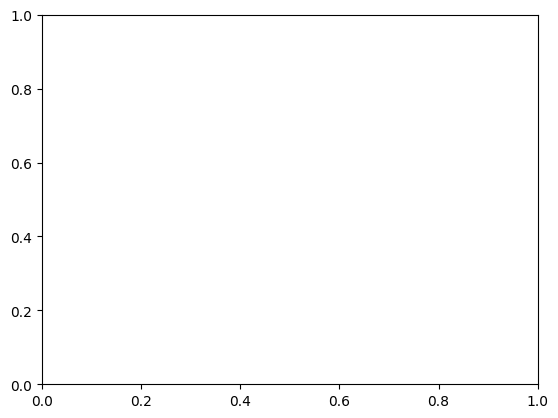

In [47]:
# EDIT THIS CELL
from defs import plot_decision_regions
from sklearn.preprocessing import StandardScaler
# ====================== Your code here =================

# Standardize the features (important for decision region plotting)
scaler = StandardScaler()


X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Plot decision regions using the custom function
plot_decision_regions(X_test, y_test.values, classifier=perceptron_model)


# =======================================================